# Bike Sharing - Linear Regression Assignment

**Problem Statement**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Step 1 - Importing Necessory Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import calendar
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Step 2 - Reading the Data

In [2]:
# Read the dataset

bike_data = pd.read_csv('day.csv')

In [3]:
# Setting Option to see all the columns

pd.set_option('display.max_columns', None)

In [4]:
# Display the head of the dataset

bike_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Display shape of the dataset

bike_data.shape

(730, 16)

In [6]:
# Display the statistical details of numerical data

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Display column wise info of the data

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Step 3 - Data Preparation - Cleaning

- Since there are no null or missing values in any columns, there is no need to drop any rows.

In [8]:
# Dropping columns with all unique values, as they might not contribute to the analysis

def removeColumnWithAllUniqueValues(column):
    if len(bike_data[column].unique()) == len(bike_data[column]):
        bike_data.drop(column, axis=1, inplace=True)
        
for column in bike_data.columns.values:
    removeColumnWithAllUniqueValues(column)

In [9]:
# Dropping 'casual' and 'registered' columns as these data combined is present in cnt, which is our target variable

bike_data.drop(columns=["casual", "registered"], inplace=True)

In [10]:
# Display shape of the dataset

bike_data.shape

(730, 12)

In [11]:
# Converting 'season', 'weathersit', 'mnth' and 'weekday' into string with season name, weather and month name.

bike_data["season"] = bike_data[["season"]].apply(lambda x : x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))
bike_data["weathersit"] = bike_data[["weathersit"]].apply(lambda x : x.map({1:"W_Clear", 2:"W_Mist", 3:"W_Light_Snow", 4:"W_Snow_Fog"}))
bike_data["mnth"] = bike_data["mnth"].apply(lambda x : calendar.month_abbr[x])
bike_data["weekday"] = bike_data[["weekday"]].apply(lambda x : x.map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}))

In [12]:
# Display the head of the data

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,W_Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,W_Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,W_Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,W_Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,W_Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 4 - EDA

#### Visualising Numeric Variables

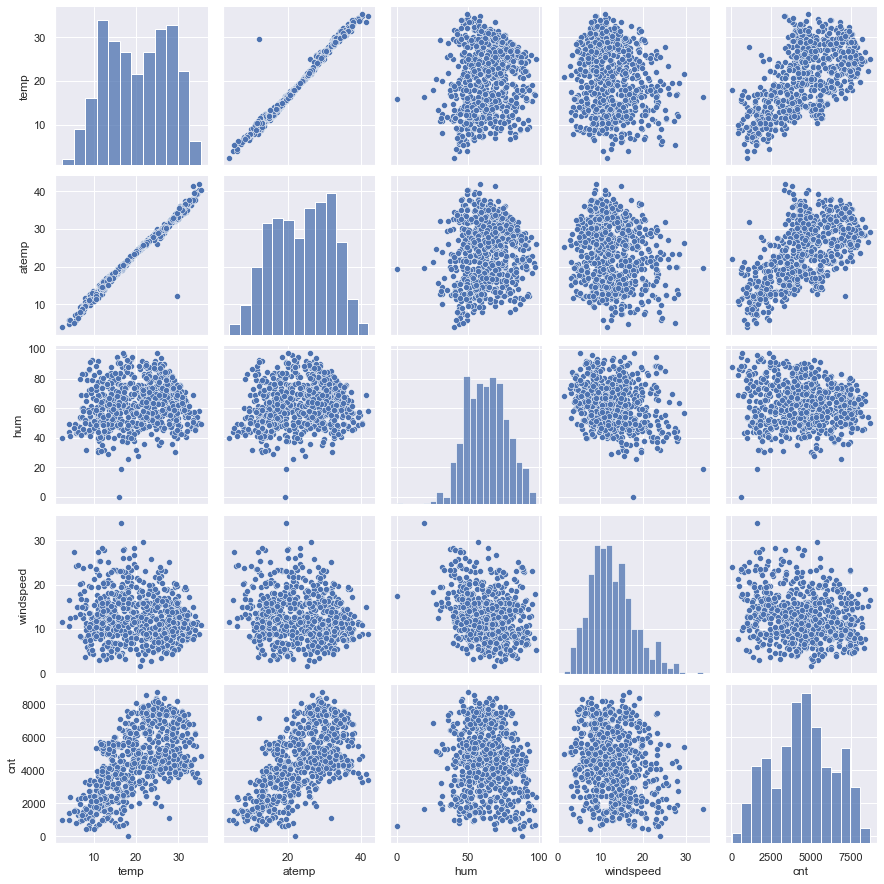

In [13]:
# Plotting a pairplot of numerical variables

sns.pairplot(data = bike_data, vars=["temp", "atemp", "hum", "windspeed", "cnt"])
plt.show()

* Its clearly visible from the scatter plot that **temp** and **atemp** carry very similar values, meaning **temp** carries almost all the information what **atemp** may carry, so its better to remove one by confirming with the correlation value as well
* Its also visble that **temp** and **atemp** has a linear relationship or pattern with **cnt**, so it might be one of the driving factors

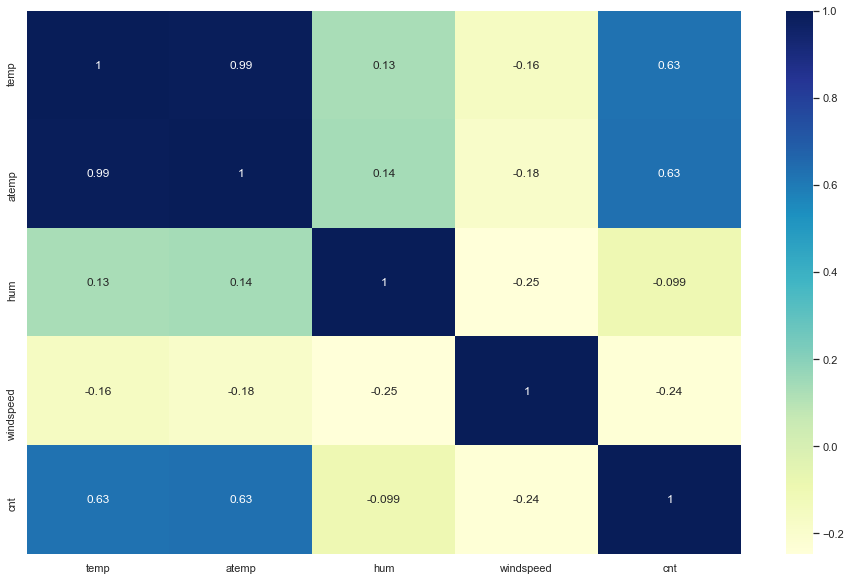

In [14]:
# Plotting a heatmap of correlation btw numerical variables

plt.figure(figsize = (16, 10))
sns.heatmap(bike_data[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot = True, cmap="YlGnBu")
plt.show()

* Now from the scatter plot and heatmap its very clear that temp and atemp are highly correlated, so one of those can be dropped. 

In [15]:
# Dropping 'atemp' from future analysis

bike_data.drop("atemp", axis=1, inplace=True)

#### Visualising Categorical Variables

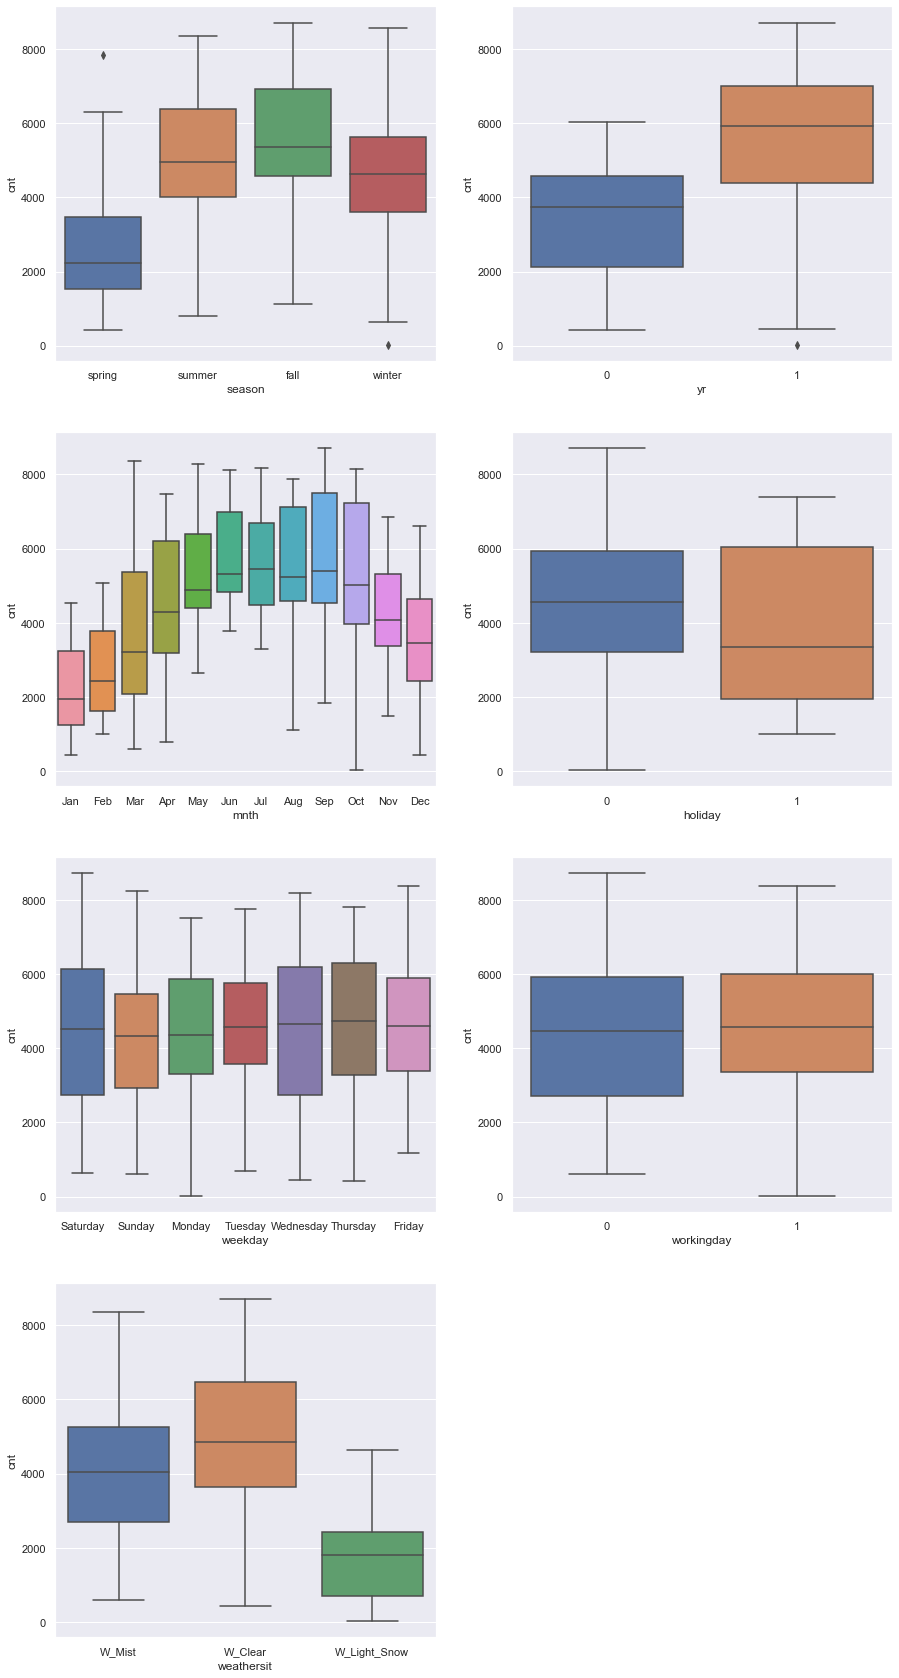

In [16]:
plt.figure(figsize=(15, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

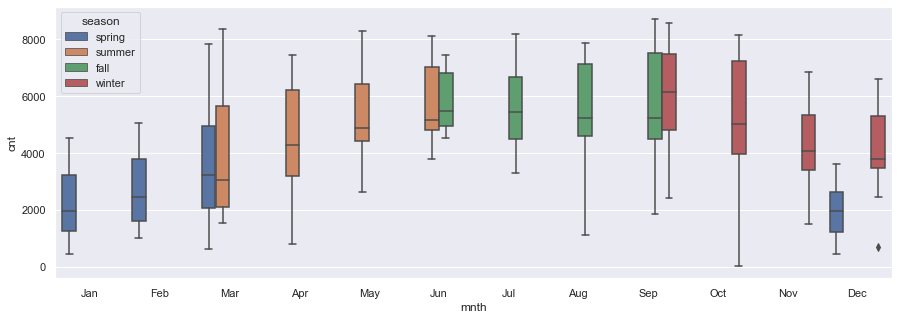

In [17]:
# plotting boxplot of 'mnth' vs 'cnt' by keeping 'season' as hue 

plt.figure(figsize = (15, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'season', data = bike_data)
plt.show()

From the visualisation of categorical variables with 'cnt', shows certain trends like :-
* During **Fall Season**, **Bike Rental** is **high** when compared to other seasons and **spring** being the **lowest**.
* Also its visible that **Bike Rental** became popular in **2019** more than when it started in **2018**.
* Its also visible that demand of **Bike Rental** increase from **Jan** steadily and peaks around at mid of the year and again decreases.
* Its also give indication that **Bike Rental** is widely used when there is a **Clear Weather** condition and **Snow and Rain** has the lowest usage.
* **June to Sept** are the months where **Bike Rentals** are widely popular than other months, and most of the **Fall season** falls during this time, confirming the usage in **Fall Season**.

### Step 5 - Data Preprocessing

In [18]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_status', also dropping first column

season_status = pd.get_dummies(bike_data.season, drop_first=True)

# concatinating 'season_status' into 'bike_data'
bike_data = pd.concat([bike_data, season_status], axis=1)

# Dropping 'season' as it is not valid now
bike_data.drop("season", axis=1, inplace=True)

- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`
- `000` will correspond to `fall`

In [19]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather_status', also dropping first column

weather_status = pd.get_dummies(bike_data.weathersit, drop_first=True)

# concatinating 'weather_status' into 'bike_data' and dropping 'weathersit'
bike_data = pd.concat([bike_data, weather_status], axis=1)

# Dropping 'weathersit' as it is not valid now
bike_data.drop("weathersit", axis=1, inplace=True)

Since 4th Category has no entries can avoiding Snow + Fog

- `00` will correspond to `Clear`
- `01` will correspond to `Mist`
- `10` will correspond to `Light Snow`

In [20]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_status', also dropping first column

mnth_status = pd.get_dummies(bike_data.mnth, drop_first=True)

# concatinating 'mnth_status' into 'bike_data' and dropping 'weathersit'
bike_data = pd.concat([bike_data, mnth_status], axis=1)

# Dropping 'weathersit' as it is not valid now
bike_data.drop("mnth", axis=1, inplace=True)

In [21]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'week_status', also dropping first column

week_status = pd.get_dummies(bike_data.weekday, drop_first=True)

# concatinating 'week_status' into 'bike_data' and dropping 'weekday'
bike_data = pd.concat([bike_data, week_status], axis=1)

# Dropping 'weekday' as it is not valid now
bike_data.drop("weekday", axis=1, inplace=True)

In [22]:
# Displaying shape and head of the data

print(bike_data.shape)
bike_data.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,W_Light_Snow,W_Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Step 6 - Splitting Data into Training and Test Sets

In [23]:
# import libraries required for splitting data

from sklearn.model_selection import train_test_split

In [24]:
# Splitting bike_data into train and test set

df_train, df_test = train_test_split(bike_data, train_size = 0.70, test_size = 0.30, random_state = 100)

In [25]:
# Printing the shape of train and test dataframes

print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features 

In [26]:
# import libraries required for scalling

from sklearn.preprocessing import MinMaxScaler

In [27]:
# Create an object of MinMaxScaler

scaler = MinMaxScaler()

In [28]:
# Applying scaler() to all the columns except the '0-1' and 'dummy' variables

columns_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[columns_vars] = scaler.fit_transform(df_train[columns_vars])

In [29]:
# Confirming if everything is scaled btw 0-1

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,W_Light_Snow,W_Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


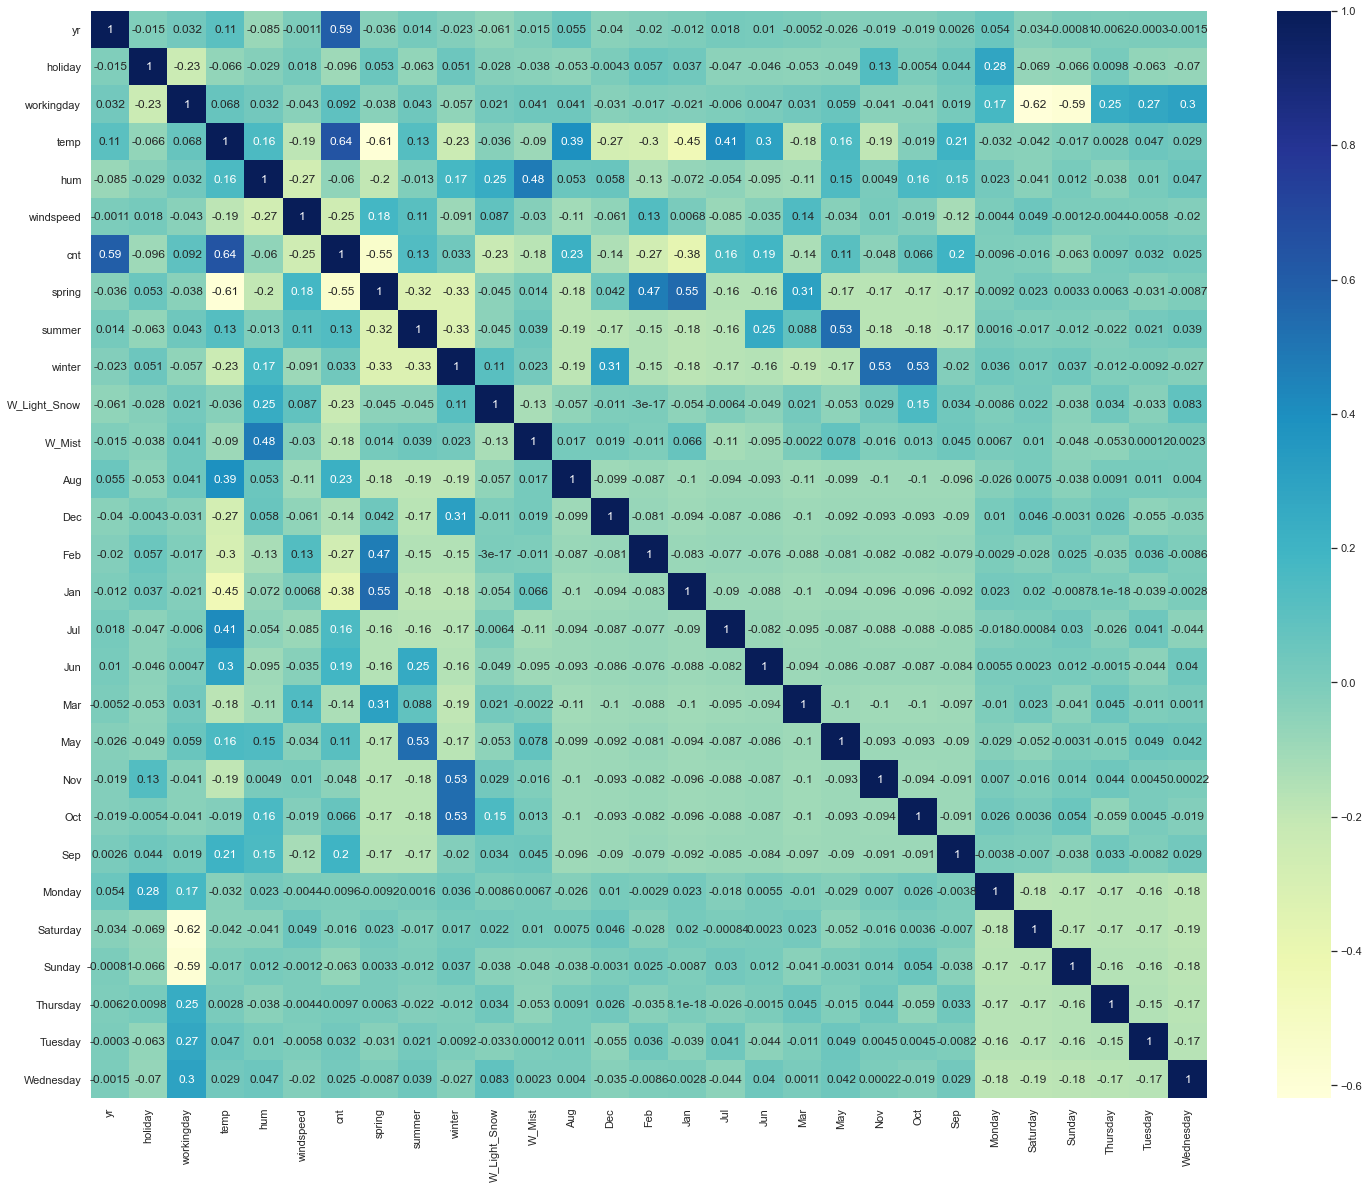

In [30]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

* From the above heatmap, **temp** seems to be correlated with **cnt** the most, then its the **yr**

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop("cnt")
X_train = df_train

### Step 7 - Building the Linear Model

In [32]:
# Importing Libraries used for RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
# Display the rfe.support values with rankings of each columns

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('W_Light_Snow', True, 1),
 ('W_Mist', True, 1),
 ('Aug', False, 5),
 ('Dec', False, 4),
 ('Feb', False, 9),
 ('Jan', False, 13),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 10),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

In [35]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'W_Light_Snow', 'W_Mist', 'Jul', 'Mar', 'Sep',
       'Saturday'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# import statsmodel.api for statsmodel analysis

import statsmodels.api as sm

In [38]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col_rfe]

In [39]:
# Adding a constant variable 

X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [40]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

In [41]:
# Displaying the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.40e-191
Time:                        21:41:46   Log-Likelihood:                 519.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2411      0.036      6.755   

In [42]:
# Calculating the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.65
3,temp,17.01
2,workingday,5.29
5,windspeed,4.72
6,spring,4.50
8,winter,3.44
7,summer,2.91
10,W_Mist,2.29
0,yr,2.08
14,Saturday,1.97


In [43]:
# Since VIF of 'hum' is very high, better to drop 'hum'

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [44]:
# Rebuiding the model without 'hum'

X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.29e-188
Time:                        21:41:46   Log-Likelihood:                 510.58
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     495   BIC:                            -927.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1613      0.031      5.257   

In [45]:
# Calculating the VIFs again after dropping 'hum' and creating a new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.21
4,windspeed,4.66
5,spring,2.66
6,summer,2.37
0,yr,2.07
7,winter,1.99
13,Saturday,1.96
10,Jul,1.58
9,W_Mist,1.56


In [46]:
# Dropping 'Mar' because its higher than p-value threshold

X_train_rfe = X_train_rfe.drop(['Mar'], axis=1)

In [47]:
# Rebuiding the model without 'Mar'

X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.73e-189
Time:                        21:41:47   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1577      0.031      5.134   

In [48]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.99
12,Saturday,1.96
10,Jul,1.58
9,W_Mist,1.56


In [49]:
# Since VIF of 'workingday' is high, better to drop 'workingday'

X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

# Rebuiding the model without 'workingday'

X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          7.97e-187
Time:                        21:41:47   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.640   

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,summer,2.22
4,spring,2.10
0,yr,2.07
6,winter,1.80
9,Jul,1.58
8,W_Mist,1.55
10,Sep,1.34
11,Saturday,1.19


In [50]:
# Dropping 'Saturday' because its higher than p-value threshold

X_train_rfe = X_train_rfe.drop(['Saturday'], axis=1)

# Rebuiding the model without 'Saturday'

X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.40e-187
Time:                        21:41:47   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1996      0.030      6.758   

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,Jul,1.58
8,W_Mist,1.55
10,Sep,1.34
7,W_Light_Snow,1.08


## Residual Analysis of the train data

In [51]:
y_train_predicted = lm.predict(X_train_rfe_lm)

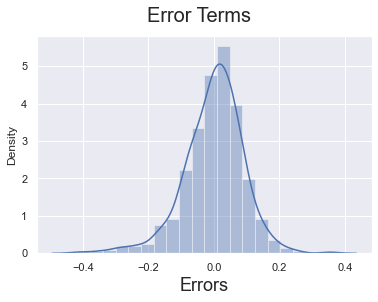

In [52]:
# Plotting histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    
plt.show()

## Making Predictions

In [53]:
# Applying scaling on test sets

columns_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[columns_vars] = scaler.transform(df_test[columns_vars])

In [54]:
# Dividing into X_test and y_test

y_test = df_test.pop("cnt")
X_test = df_test

In [55]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
y_test_predicted = lm.predict(X_test_new)

In [57]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
r2_test

0.804941844098238

In [58]:
adjusted_r2_test = 1 - ((1 - r2_test)* (X_test_new.shape[0] - 1)) /  (X_test_new.shape[0] - X_test_new.shape[1] - 1)
adjusted_r2_test

0.7935792330748344

In [59]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
r2_train

0.8357767594654057

In [60]:
adjusted_r2_train = 1 - ((1 - r2_train)* (X_train_rfe.shape[0] - 1)) /  (X_train_rfe.shape[0] - X_train_rfe.shape[1] - 1)
adjusted_r2_train

0.832149338489742

### Conclusions

Comparing Train and Test Dataset :

* Train Dataset R^2           : 0.836
* Train Dataset Adjusted R^2  : 0.832
* Test Dataset R^2            : 0.805
* Test Dataset Adjusted R^2   : 0.793

We can see that the equation of our best fitted line is:

$ cnt = 0.2335  \times  yr + -0.0980  \times  holiday + 0.4915 \times temp + -0.1480 \times windspeed + -0.0669 \times spring + 0.0453 \times summer + 0.0831 \times winter + -0.2852 \times W_Light_Snow + -0.0816 \times W_Mist + -0.0524 \times Jul + 0.0767 \times Sep + 0.1996 \times const $


From the visualisation of numerical variables, shows certain trends like :-

* Its visble that **temp** and **atemp** has a linear relationship or pattern with **cnt**, so it might be one of the driving factors

From the visualisation of categorical variables with 'cnt', shows certain trends like :-
* During **Fall Season**, **Bike Rental** is **high** when compared to other seasons and **spring** being the **lowest**.
* Also its visible that **Bike Rental** became popular in **2019** more than when it started in **2018**.
* Its also visible that demand of **Bike Rental** increase from **Jan** steadily and peaks around at mid of the year and again decreases.
* Its also give indication that **Bike Rental** is widely used when there is a **Clear Weather** condition and **Snow and Rain** has the lowest usage.
* **June to Sept** are the months where **Bike Rentals** are widely popular than other months, and most of the **Fall season** falls during this time, confirming the usage in **Fall Season**.